In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [11]:
df = pd.read_csv("marketing.csv")
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [24]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [29]:
df.duplicated().sum()


0

In [30]:
df=df.drop(columns=['ID','Dt_Customer'],axis=1)

In [31]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [34]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Single')
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [35]:
df['Total_Expenses'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776


In [36]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21


In [37]:
df['Kids'] =df['Kidhome']+df['Teenhome']
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,21,0


In [38]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp1']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,776,21,0,0


In [39]:
col_del=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp1','AcceptedCmp4','AcceptedCmp5','Response']
df=df.drop(columns=col_del,axis=1)
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0


In [41]:
df.shape

(2240, 12)

In [42]:
df['Age']=2024 - df['Year_Birth']
df.drop('Year_Birth',axis=1, inplace=True)
df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,0,27,6,2,0,70
2,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0,59


In [43]:
dfc=df.copy()

In [44]:
cate = ['Education','Marital_Status']
lbl_encoder=LabelEncoder()
for i in cate:
  df[i]=df[[i]].apply(lbl_encoder.fit_transform)


In [45]:
df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,0,1617,25,0,1,67
1,2,0,46344.0,38,5,0,0,27,6,2,0,70
2,2,1,71613.0,26,4,0,0,776,21,0,0,59


In [48]:
df1=df.copy()

scaled_features= StandardScaler().fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features,index=df1.index,columns=df1.columns)

scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.28014,-0.097282,1.679417,1.320826,-1.264505,0.565215,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.28014,-0.097282,-0.961275,-1.154596,1.396361,-0.441209,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.28014,-0.097282,0.282673,0.799685,-1.264505,-0.441209,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.28014,-0.097282,-0.918094,-0.894025,0.065928,-0.441209,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.28014,-0.097282,-0.305254,0.539114,0.065928,-0.441209,-1.017761


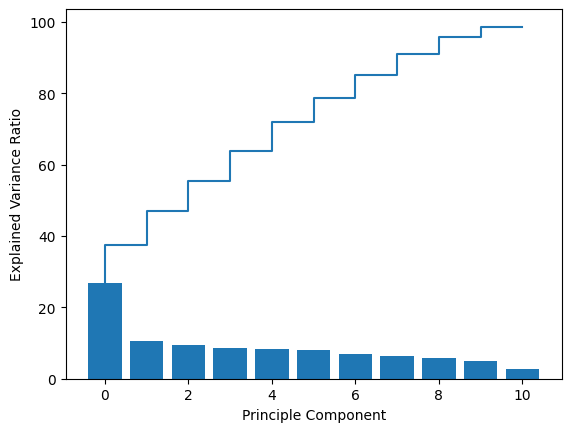

In [51]:
cov_matrix = np.cov(scaled_features.T)
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

if eig_vals.size == 0:
    print("Error: No eigenvalues calculated.")
else:
    total = sum(eig_vals)
    var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)


    if len(var_exp) < 11:
        print("Error: Not enough eigenvalues for plotting.")
    else:
        plt.bar(range(11), var_exp[:11])
        plt.step(range(11), cum_var_exp[:11])
        plt.xlabel("Principle Component")
        plt.ylabel("Explained Variance Ratio")
        plt.show()


In [52]:
pca = PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.932580,-0.024498,0.148893,0.749736,-1.116240,0.157587,-0.987964,-0.697275
1,-1.502881,1.019695,0.265936,0.458132,-1.016308,1.001469,-0.993112,0.697714
2,1.302453,-0.085656,-0.656782,-0.640834,0.773514,0.668537,-0.155554,0.573057
3,-1.739951,-1.022811,-0.349375,-0.863899,0.622212,0.486293,0.554484,-0.066173
4,0.058780,0.682120,-0.564413,-0.320212,-0.071532,-1.532572,1.539748,-0.601097


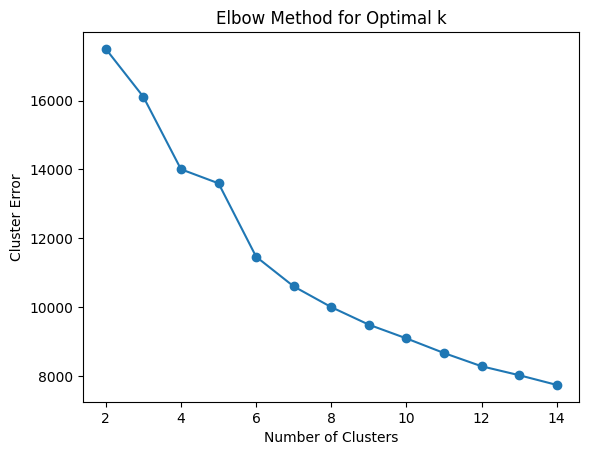

In [56]:
cluster_errors = []
cluster_range = range(2, 15)

for num_clusters in cluster_range:
    cluster = KMeans(n_clusters=num_clusters, random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

cluster_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors': cluster_errors})
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Error')
plt.title('Elbow Method for Optimal k')
plt.show()


In [59]:
Kmeans = KMeans(n_clusters=3,random_state=100)
Kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [60]:
label = pd.DataFrame(Kmeans.labels_,columns=['Label'])
Kmeans_df=pca_df.join(label)
Kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.932580,-0.024498,0.148893,0.749736,-1.116240,0.157587,-0.987964,-0.697275,0
1,-1.502881,1.019695,0.265936,0.458132,-1.016308,1.001469,-0.993112,0.697714,1
2,1.302453,-0.085656,-0.656782,-0.640834,0.773514,0.668537,-0.155554,0.573057,0
3,-1.739951,-1.022811,-0.349375,-0.863899,0.622212,0.486293,0.554484,-0.066173,1
4,0.058780,0.682120,-0.564413,-0.320212,-0.071532,-1.532572,1.539748,-0.601097,2


In [61]:
Kmeans_df['Label'].value_counts()

1    968
2    720
0    552
Name: Label, dtype: int64

<Axes: xlabel='PC1', ylabel='PC2'>

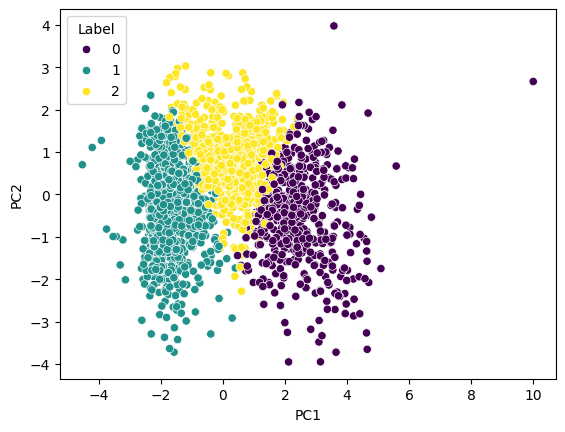

In [64]:
#sns.scatterplot([Kmeans_df['PC1'],Kmeans_df['PC2']])
sns.scatterplot(data=Kmeans_df, x= 'PC1', y='PC2' ,hue ='Label', palette='viridis')

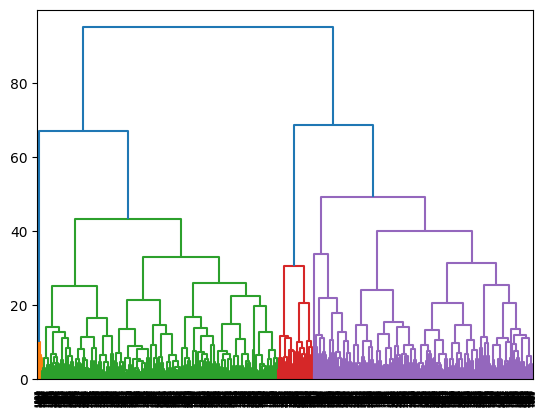

In [66]:
merge = linkage(scaled_features, method = 'ward')
dendrogram(merge, leaf_rotation=90)
plt.show()

In [67]:
from sklearn.metrics import silhouette_score
for i in range(2,25):
  hier = AgglomerativeClustering(n_clusters=i)
  hier = hier.fit(scaled_features_df)
  labels = hier.fit_predict(scaled_features_df)
  print(i,silhouette_score(scaled_features_df,labels))

2 0.17702189018689626
3 0.2035291422342625
4 0.21271520757934465
5 0.18931953016290035
6 0.13820241920043463
7 0.13779675634382746
8 0.13900615347896814
9 0.11867909690888696
10 0.11224159967304996
11 0.11780898640315637
12 0.1175727990117668
13 0.12061772129741019
14 0.1201739161245528
15 0.1208098251934121
16 0.12193470069411842
17 0.12167568228893152
18 0.11505775269334928
19 0.11664710773441607
20 0.114058338334116
21 0.11385539090104714
22 0.11408220090622957
23 0.11674785093028309
24 0.11767600108476933


In [68]:
hie_cluster=AgglomerativeClustering(n_clusters=3,linkage = 'ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [71]:
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head()

,Labels
0,1
1,0
2,1
3,0
4,0


In [72]:
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,0,1617,25,0,1,67,1
1,Graduation,Single,46344.0,38,5,0,0,27,6,2,0,70,0
2,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0,59,1
3,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0,40,0
4,PhD,relationship,58293.0,94,5,0,0,422,19,1,0,43,0
